In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# plot title 한글 패치
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
df_spend = pd.read_csv('./2019년 경기도 시군구 남녀별 월 단위 소비패턴 현황.csv', parse_dates=["년월"])

In [4]:
df_spend.shape

(9813, 6)

In [5]:
df_spend.head()

,년월,시도명,시군구명,성별코드,가맹점업종명,총결제금액
0,2019-03-01,경기도,양주시,F,유통업 영리,7600
1,2019-03-01,경기도,양주시,F,일반휴게음식,26200
2,2019-04-01,경기도,가평군,F,회원제형태,10000
3,2019-04-01,경기도,가평군,F,기타,10450
4,2019-04-01,경기도,가평군,F,신변잡화,45500


In [6]:
df_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년월      9813 non-null   datetime64[ns]
 1   시도명     9813 non-null   object        
 2   시군구명    9813 non-null   object        
 3   성별코드    9813 non-null   object        
 4   가맹점업종명  9813 non-null   object        
 5   총결제금액   9813 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 460.1+ KB


In [7]:
pd.set_option('float_format', '{:.2f}'.format)
df_spend.describe()

,총결제금액
count,9813.00
mean,6775770.10
std,24714484.67
min,10.00
25%,126000.00
50%,650000.00
75%,3203540.00
max,635011033.00


In [8]:
# 결측치 확인
df_spend.isnull().sum()

년월        0
시도명       0
시군구명      0
성별코드      0
가맹점업종명    0
총결제금액     0
dtype: int64

In [9]:
df_spend['시군구명'].unique()

array(['양주시', '가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시',
       '광주시', '구리시', '군포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구',
       '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시',
       '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '양평군', '여주시', '오산시',
       '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시', '연천군', '안양시 만안구', '김포시'], dtype=object)

In [10]:
#경기 행정구역 - 시 : 28 / 군 : 3 (31) 
s_split = df_spend['시군구명'].str.split(" ", expand=True)
len(s_split[0].unique())

31

## 데이터 전처리
* 년월 컬럼 사용하기 위해 전처리
* 시군구명 컬럼에서 고양시, 수원시, 용인시, 성남시, 안산시는 구별로 나눠져 있음  
  구별로 나누지 않고 보기 위해 행정구역 컬럼 추가

In [11]:
df_spend["year"] = df_spend["년월"].dt.year
df_spend["month"] = df_spend["년월"].dt.month
df_spend['year_month'] = df_spend["년월"].dt.strftime("%Y-%m")
df_spend['행정구역'] = s_split[0]

In [12]:
df_spend.head()

,년월,시도명,시군구명,성별코드,가맹점업종명,총결제금액,year,month,year_month,행정구역
0,2019-03-01,경기도,양주시,F,유통업 영리,7600,2019,3,2019-03,양주시
1,2019-03-01,경기도,양주시,F,일반휴게음식,26200,2019,3,2019-03,양주시
2,2019-04-01,경기도,가평군,F,회원제형태,10000,2019,4,2019-04,가평군
3,2019-04-01,경기도,가평군,F,기타,10450,2019,4,2019-04,가평군
4,2019-04-01,경기도,가평군,F,신변잡화,45500,2019,4,2019-04,가평군


## 데이터 탐색

<AxesSubplot:xlabel='year_month', ylabel='총결제금액'>

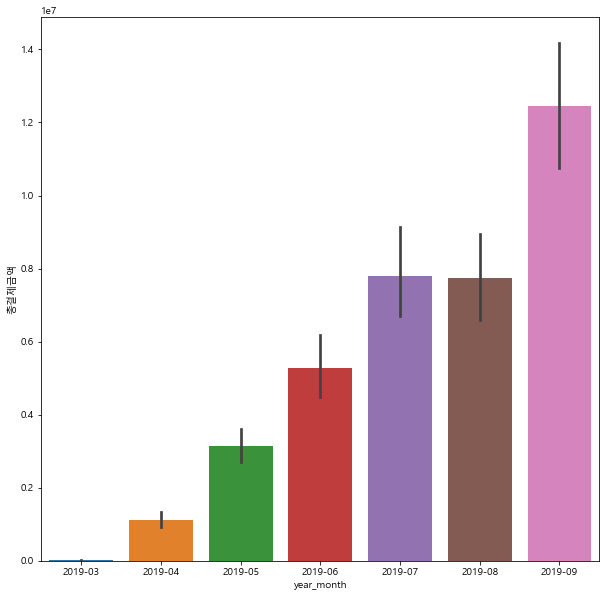

In [13]:
#월별 결제금액 추이
figure, ax1 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(10, 10)

sns.barplot(data=df_spend, x='year_month', y='총결제금액' ,ax=ax1)

In [14]:
month_s = df_spend.groupby('month')
month_s['총결제금액'].sum().sort_values(ascending=False)

month
9    23624952959
7    13990955896
8    13948270161
6     8948638680
5     4728772054
4     1249008461
3          33800
Name: 총결제금액, dtype: int64

## 데이터 추출

In [15]:
df_spend.to_csv('경기도_남녀별_소비.csv', index = False)